In [67]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.sparse import csr_matrix
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [2]:
df=pd.read_csv('data.csv',index_col='id')

In [3]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


## Normalize data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [34]:
intcol=['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
floatcol=[]
allcol=df.columns.tolist()
for i in allcol:
    if not (i in intcol):
        floatcol.append(i)
tonewtypecol = dict.fromkeys(intcol, 'int8')
tofloat16 = dict.fromkeys(floatcol, 'float16')
tonewtypecol.update(tofloat16)
df.astype(tonewtypecol).dtypes

f_00    float16
f_01    float16
f_02    float16
f_03    float16
f_04    float16
f_05    float16
f_06    float16
f_07       int8
f_08       int8
f_09       int8
f_10       int8
f_11       int8
f_12       int8
f_13       int8
f_14    float16
f_15    float16
f_16    float16
f_17    float16
f_18    float16
f_19    float16
f_20    float16
f_21    float16
f_22    float16
f_23    float16
f_24    float16
f_25    float16
f_26    float16
f_27    float16
f_28    float16
dtype: object

In [38]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
id,,,,,,,,,,,,,,,,,,,,,
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [ ]:
df.memory_usage()

<AxesSubplot:>

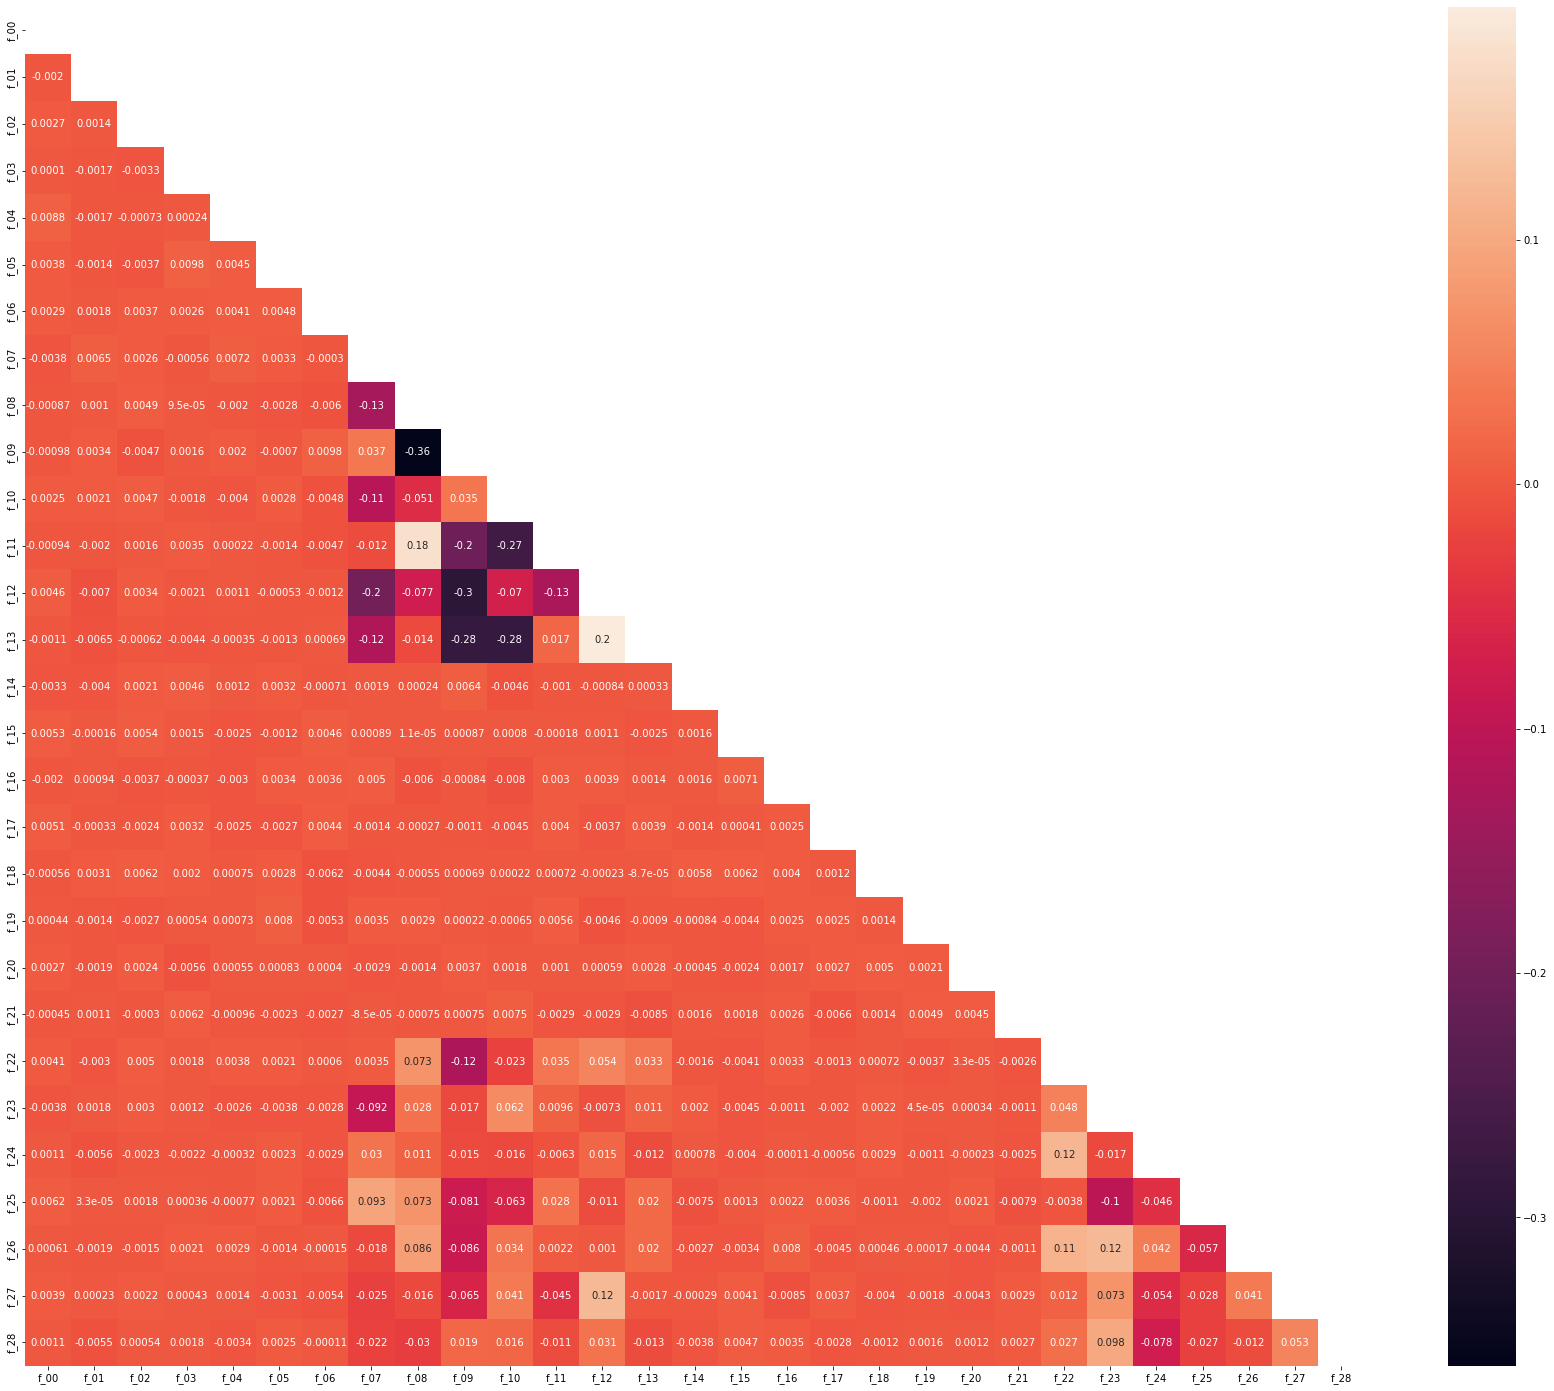

In [35]:
# Correlation between different variables
corr = df.corr()
f, ax = plt.subplots(figsize=(30, 25))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask)

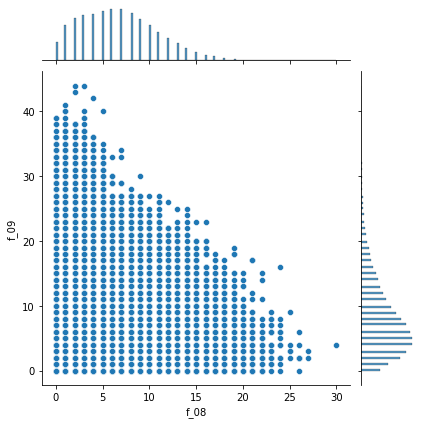

In [36]:
sns.jointplot(data=df, x='f_08', y='f_09')

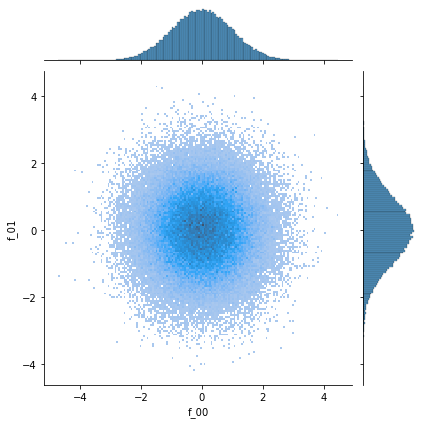

In [37]:
sns.jointplot(data=df, x='f_00', y='f_01',kind='hist')

## Train models

#### 1. K-means
* 7-0.23783

In [57]:
clusters_k_means = KMeans(n_clusters = 7).fit_predict(df)

#### 2. Gaussian Mixture
* 7-0.49526
* 8-0.46520
* 9-0.45083

In [64]:
clusters_mixture = GaussianMixture(n_components = 6).fit_predict(df)

#### 3. Affinity Propagation
* 7-

In [71]:
af = AffinityPropagation(preference=-50, random_state=0).fit(df[:1000])
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
n_clusters_ = len(cluster_centers_indices)


Estimated number of clusters: 0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:246: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn("Affinity propagation did not converge, this model "


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

## Submission

In [65]:
submission = pd.read_csv("sample_submission.csv")
submission["Predicted"] = clusters_mixture
submission.to_csv('submission.csv', index=False)